In [1]:
import pandas as pd
import numpy as np
import gc

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap
import umap.plot

In [3]:
# TSNE Parameter
tsne_learning_rate=100
tsne_perplexity=200
tsne_n_iter=5000
tsne_random_state=1337

## Baseline Domain Gap Visualization

In [4]:
# CSV Filepath
filepath_base_city = "extracted_features/csv/baseline_cityscape.csv"
filepath_base_itri = "extracted_features/csv/baseline_itri.csv"

df_base_city = pd.read_csv(filepath_base_city)
df_base_itri = pd.read_csv(filepath_base_itri)

In [5]:
# Get features and target labels
x_base_city_features = df_base_city.iloc[: , :-1]
y_base_city_labels = df_base_city['4096']

x_base_itri_features = df_base_itri.iloc[: , :-1]
y_base_itri_labels = df_base_itri['4096']

# Remove dataframe to save memory
del df_base_city, df_base_itri
gc.collect()

2131

In [6]:
# CSV Filepath
filepath_adv_city = "extracted_features/csv/adversarial_cityscape.csv"
filepath_adv_itri = "extracted_features/csv/adversarial_itri.csv"

df_adv_city = pd.read_csv(filepath_adv_city)
df_adv_itri = pd.read_csv(filepath_adv_itri)

In [7]:
# Get features and target labels
x_adv_city_features = df_adv_city.iloc[: , :-1]
y_adv_city_labels = df_adv_city['4096']

x_adv_itri_features = df_adv_itri.iloc[: , :-1]
y_adv_itri_labels = df_adv_itri['4096']

del df_adv_city, df_adv_itri
gc.collect()

0

In [8]:
# CSV Filepath
filepath_fine_city = "extracted_features/csv/finetune_cityscape.csv"
filepath_fine_itri = "extracted_features/csv/finetune_itri.csv"

df_fine_city = pd.read_csv(filepath_fine_city)
df_fine_itri = pd.read_csv(filepath_fine_itri)

In [9]:
# Get features and target labels
x_fine_city_features = df_fine_city.iloc[: , :-1]
y_fine_city_labels = df_fine_city['4096']

x_fine_itri_features = df_fine_itri.iloc[: , :-1]
y_fine_itri_labels = df_fine_itri['4096']

# Remove dataframe to save memory
del df_fine_city, df_fine_itri
gc.collect()

0

In [10]:
# CSV Filepath
filepath_orac_city = "extracted_features/csv/oracle_cityscape.csv"
filepath_orac_itri = "extracted_features/csv/oracle_itri.csv"

df_orac_city = pd.read_csv(filepath_orac_city)
df_orac_itri = pd.read_csv(filepath_orac_itri)

In [11]:
# Get features and target labels
x_orac_city_features = df_orac_city.iloc[: , :-1]
y_orac_city_labels = df_orac_city['4096']

x_orac_itri_features = df_orac_itri.iloc[: , :-1]
y_orac_itri_labels = df_orac_itri['4096']

# Remove dataframe to save memory
del df_orac_city, df_orac_itri
gc.collect()

0

## Dimensionality Reduction

## PCA

In [12]:
pca = PCA(n_components=2)

x_base_city_features_pca = pca.fit(x_base_city_features).transform(x_base_city_features)
x_base_itri_features_pca = pca.fit(x_base_itri_features).transform(x_base_itri_features)

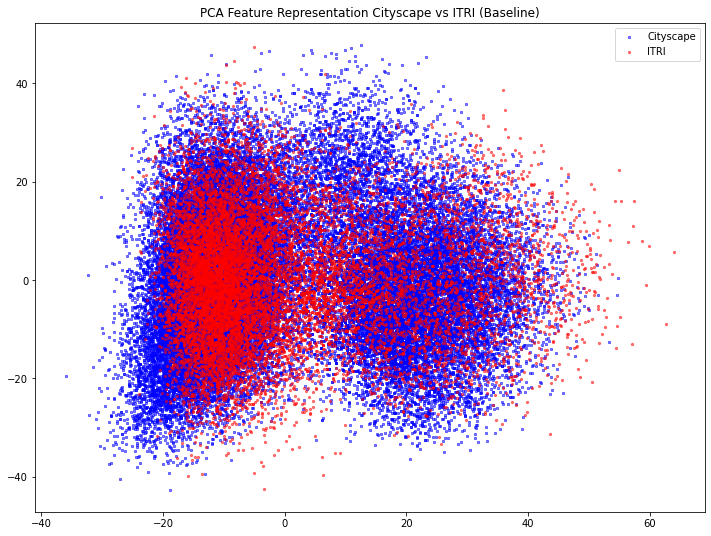

In [13]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_base_city_features_pca[:,0],
            x_base_city_features_pca[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_base_itri_features_pca[:,0],
            x_base_itri_features_pca[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('PCA Feature Representation Cityscape vs ITRI (Baseline)')
plt.savefig('extracted_features/tsne/pca_base.png', bbox_inches='tight')
plt.show()

In [14]:
pca = PCA(n_components=2)

x_adv_city_features_pca = pca.fit(x_adv_city_features).transform(x_adv_city_features)
x_adv_itri_features_pca = pca.fit(x_adv_itri_features).transform(x_adv_itri_features)

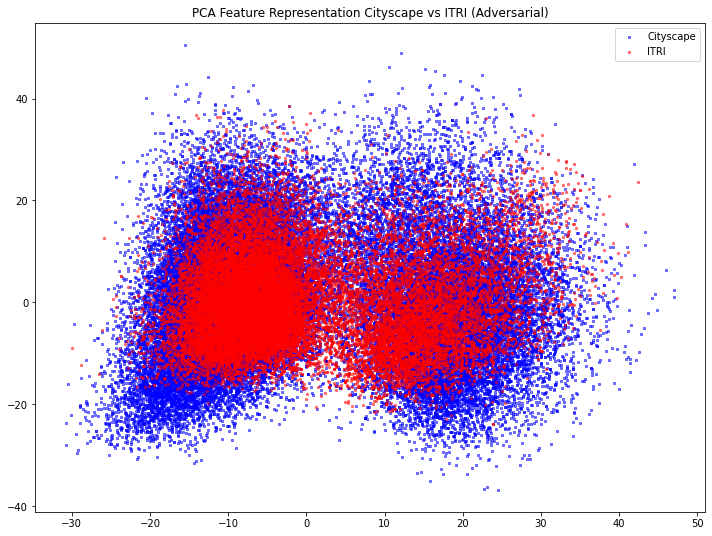

In [15]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_adv_city_features_pca[:,0],
            x_adv_city_features_pca[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_adv_itri_features_pca[:,0],
            x_adv_itri_features_pca[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('PCA Feature Representation Cityscape vs ITRI (Adversarial)')
plt.savefig('extracted_features/tsne/pca_adv.png', bbox_inches='tight')
plt.show()

In [16]:
pca = PCA(n_components=2)

x_fine_city_features_pca = pca.fit(x_fine_city_features).transform(x_fine_city_features)
x_fine_itri_features_pca = pca.fit(x_fine_itri_features).transform(x_fine_itri_features)

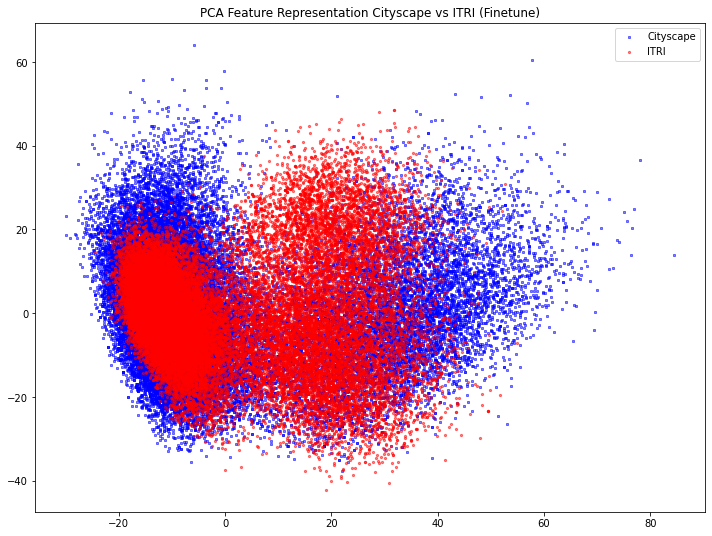

In [17]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_fine_city_features_pca[:,0],
            x_fine_city_features_pca[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_fine_itri_features_pca[:,0],
            x_fine_itri_features_pca[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('PCA Feature Representation Cityscape vs ITRI (Finetune)')
plt.savefig('extracted_features/tsne/pca_fine.png', bbox_inches='tight')
plt.show()

In [18]:
pca = PCA(n_components=2)

x_orac_city_features_pca = pca.fit(x_orac_city_features).transform(x_orac_city_features)
x_orac_itri_features_pca = pca.fit(x_orac_itri_features).transform(x_orac_itri_features)

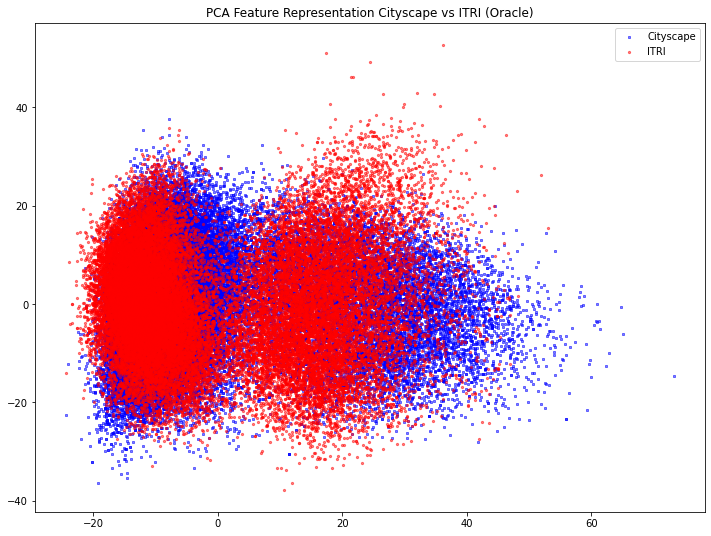

In [19]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_orac_city_features_pca[:,0],
            x_orac_city_features_pca[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_orac_itri_features_pca[:,0],
            x_orac_itri_features_pca[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('PCA Feature Representation Cityscape vs ITRI (Oracle)')
plt.savefig('extracted_features/tsne/pca_oracle.png', bbox_inches='tight')
plt.show()

## Linear Discriminant Analysis

In [20]:
# lda = LinearDiscriminantAnalysis(n_components=2)

# x_base_city_features_lda = lda.fit(x_base_city_features, y_base_city_labels).transform(x_base_city_features)
# x_base_itri_features_lda = lda.fit(x_base_itri_features, y_base_itri_labels).transform(x_base_itri_features)

In [21]:
# # Plot the Baseline Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_base_city_features_lda[:,0],
#             x_base_city_features_lda[:,1],
#             s=5,
#             c='b',
#             alpha=.5,
#             marker="s",
#             label='Cityscape')

# ax1.scatter(x_base_itri_features_lda[:,0],
#             x_base_itri_features_lda[:,1],
#             s=5,
#             c='r',
#             alpha=.5,
#             marker="o",
#             label='ITRI')

# plt.legend(loc='upper right')
# plt.title('LDA Feature Representation Cityscape vs ITRI (Baseline)')
# plt.savefig('extracted_features/tsne/lda_base.png', bbox_inches='tight')
# plt.show()

In [22]:
# lda = LinearDiscriminantAnalysis(n_components=2)

# x_adv_city_features_lda = lda.fit(x_adv_city_features, y_adv_city_labels).transform(x_adv_city_features)
# x_adv_itri_features_lda = lda.fit(x_adv_itri_features, y_adv_itri_labels).transform(x_adv_itri_features)

In [23]:
# # Plot the Adversarial Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_adv_city_features_lda[:,0],
#             x_adv_city_features_lda[:,1],
#             s=5,
#             c='b',
#             alpha=.5,
#             marker="s",
#             label='Cityscape')

# ax1.scatter(x_adv_itri_features_lda[:,0],
#             x_adv_itri_features_lda[:,1],
#             s=5,
#             c='r',
#             alpha=.5,
#             marker="o",
#             label='ITRI')

# plt.legend(loc='upper right')
# plt.title('LDA Feature Representation Cityscape vs ITRI (Adversarial)')
# plt.savefig('extracted_features/tsne/lda_adv.png', bbox_inches='tight')
# plt.show()

In [24]:
# lda = LinearDiscriminantAnalysis(n_components=2)

# x_fine_city_features_lda = lda.fit(x_fine_city_features, y_fine_city_labels).transform(x_fine_city_features)
# x_fine_itri_features_lda = lda.fit(x_fine_itri_features, y_fine_itri_labels).transform(x_fine_itri_features)

In [25]:
# # Plot the Finetune Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_fine_city_features_lda[:,0],
#             x_fine_city_features_lda[:,1],
#             s=5,
#             c='b',
#             alpha=.5,
#             marker="s",
#             label='Cityscape')

# ax1.scatter(x_fine_itri_features_lda[:,0],
#             x_fine_itri_features_lda[:,1],
#             s=5,
#             c='r',
#             alpha=.5,
#             marker="o",
#             label='ITRI')

# plt.legend(loc='upper right')
# plt.title('LDA Feature Representation Cityscape vs ITRI (Finetune)')
# plt.savefig('extracted_features/tsne/lda_fine.png', bbox_inches='tight')
# plt.show()

In [26]:
# lda = LinearDiscriminantAnalysis(n_components=2)

# x_orac_city_features_lda = lda.fit(x_orac_city_features, y_orac_city_labels).transform(x_orac_city_features)
# x_orac_itri_features_lda = lda.fit(x_orac_itri_features, y_orac_itri_labels).transform(x_orac_itri_features)

In [27]:
# # Plot the Oracle Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_orac_city_features_lda[:,0],
#             x_orac_city_features_lda[:,1],
#             s=5,
#             c='b',
#             alpha=.5,
#             marker="s",
#             label='Cityscape')

# ax1.scatter(x_orac_itri_features_lda[:,0],
#             x_orac_itri_features_lda[:,1],
#             s=5,
#             c='r',
#             alpha=.5,
#             marker="o",
#             label='ITRI')

# plt.legend(loc='upper right')
# plt.title('LDA Feature Representation Cityscape vs ITRI (Oracle)')
# plt.savefig('extracted_features/tsne/lda_oracle.png', bbox_inches='tight')
# plt.show()

## t-Distributed Stochastic Neighbor Embedding

In [28]:
x_base_city_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_base_city_features)

x_base_itri_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_base_itri_features)

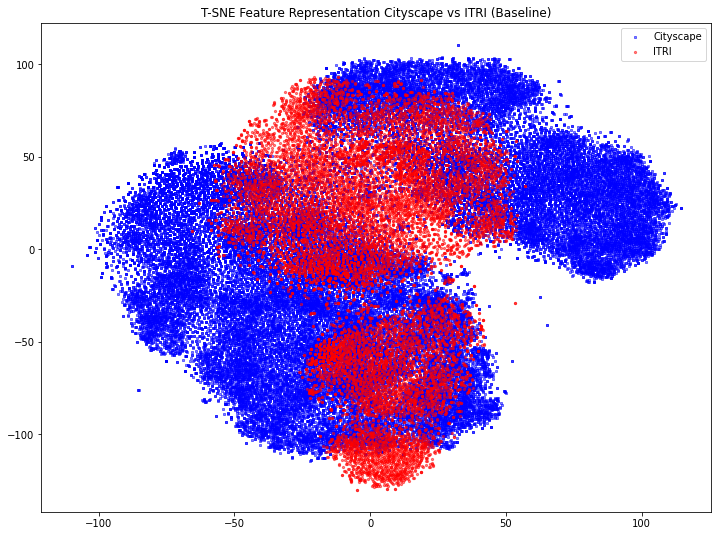

In [29]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_base_city_features_tsne[:,0],
            x_base_city_features_tsne[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_base_itri_features_tsne[:,0],
            x_base_itri_features_tsne[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline)')
plt.savefig('extracted_features/tsne/tsne_base.png', bbox_inches='tight')
plt.show()

In [30]:
x_adv_city_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_adv_city_features)

x_adv_itri_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_adv_itri_features)

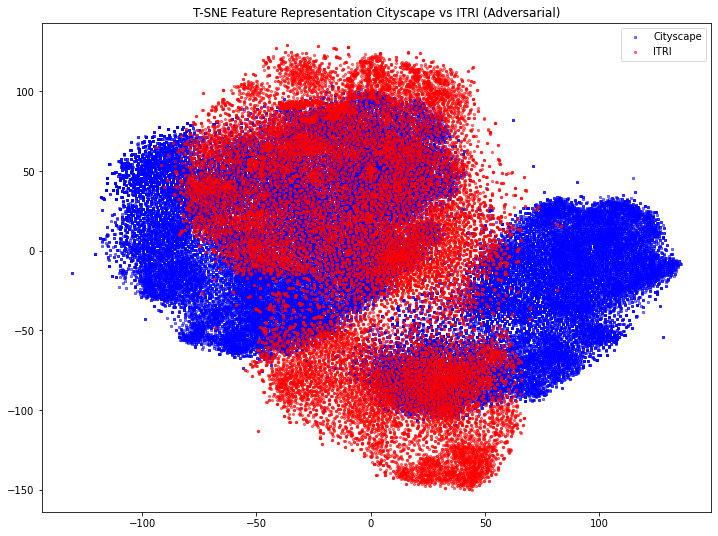

In [31]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_adv_city_features_tsne[:,0],
            x_adv_city_features_tsne[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_adv_itri_features_tsne[:,0],
            x_adv_itri_features_tsne[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial)')
plt.savefig('extracted_features/tsne/tsne_adv.png', bbox_inches='tight')
plt.show()

In [32]:
x_fine_city_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_fine_city_features)

x_fine_itri_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_fine_itri_features)

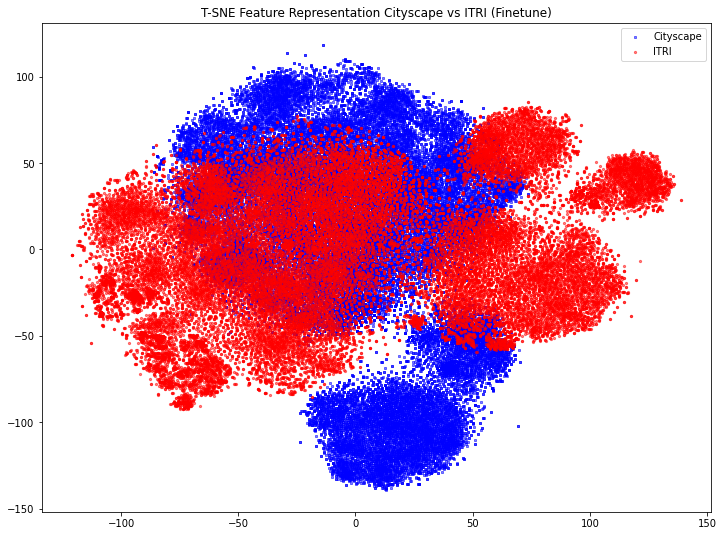

In [33]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_fine_city_features_tsne[:,0],
            x_fine_city_features_tsne[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_fine_itri_features_tsne[:,0],
            x_fine_itri_features_tsne[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Finetune)')
plt.savefig('extracted_features/tsne/tsne_fine.png', bbox_inches='tight')
plt.show()

In [34]:
x_orac_city_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_orac_city_features)

x_orac_itri_features_tsne = TSNE(learning_rate=tsne_learning_rate,
                                 perplexity=tsne_perplexity,
                                 n_iter=tsne_n_iter,
                                 random_state=tsne_random_state).fit_transform(x_orac_itri_features)

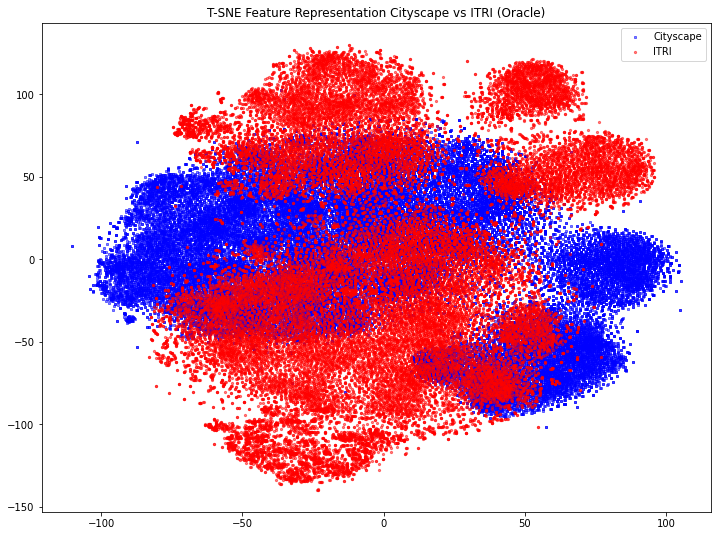

In [35]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

ax1.scatter(x_orac_city_features_tsne[:,0],
            x_orac_city_features_tsne[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape')

ax1.scatter(x_orac_itri_features_tsne[:,0],
            x_orac_itri_features_tsne[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Oracle)')
plt.savefig('extracted_features/tsne/tsne_oracle.png', bbox_inches='tight')
plt.show()

## Class 1 / Pedestrian

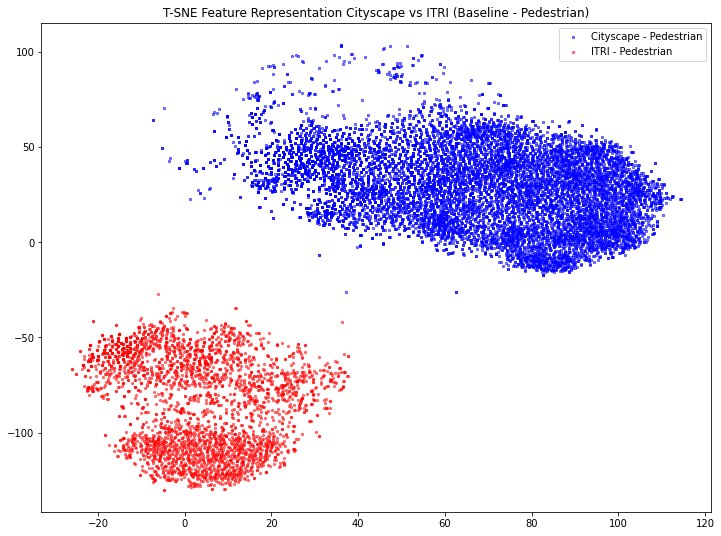

In [36]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_base_city_features_tsne_class1 = x_base_city_features_tsne[y_base_city_labels==1]
x_base_itri_features_tsne_class1 = x_base_itri_features_tsne[y_base_itri_labels==1]

ax1.scatter(x_base_city_features_tsne_class1[:,0],
            x_base_city_features_tsne_class1[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Pedestrian')

ax1.scatter(x_base_itri_features_tsne_class1[:,0],
            x_base_itri_features_tsne_class1[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Pedestrian')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline - Pedestrian)')
plt.savefig('extracted_features/tsne/tsne_base_class1.png', bbox_inches='tight')
plt.show()

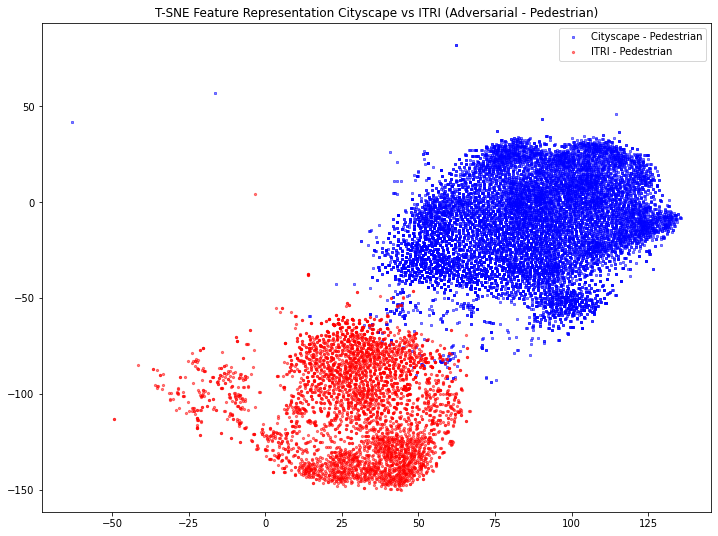

In [37]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_adv_city_features_tsne_class1 = x_adv_city_features_tsne[y_adv_city_labels==1]
x_adv_itri_features_tsne_class1 = x_adv_itri_features_tsne[y_adv_itri_labels==1]

ax1.scatter(x_adv_city_features_tsne_class1[:,0],
            x_adv_city_features_tsne_class1[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Pedestrian')

ax1.scatter(x_adv_itri_features_tsne_class1[:,0],
            x_adv_itri_features_tsne_class1[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Pedestrian')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial - Pedestrian)')
plt.savefig('extracted_features/tsne/tsne_adv_class1.png', bbox_inches='tight')
plt.show()

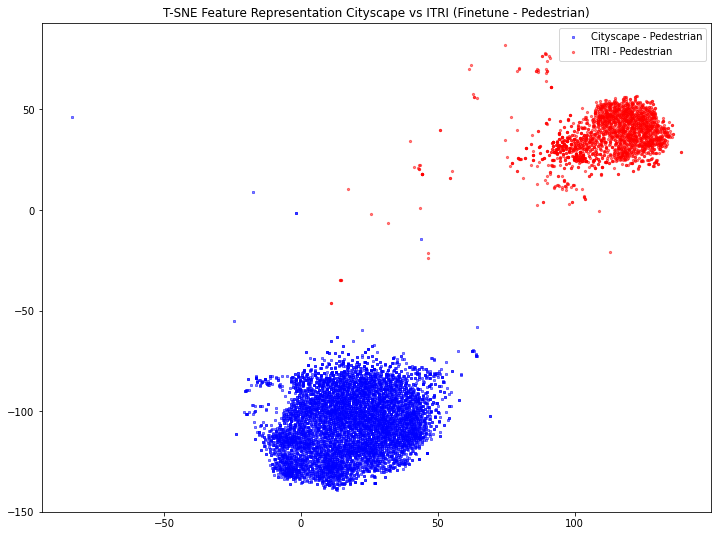

In [38]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_fine_city_features_tsne_class1 = x_fine_city_features_tsne[y_fine_city_labels==1]
x_fine_itri_features_tsne_class1 = x_fine_itri_features_tsne[y_fine_itri_labels==1]

ax1.scatter(x_fine_city_features_tsne_class1[:,0],
            x_fine_city_features_tsne_class1[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Pedestrian')

ax1.scatter(x_fine_itri_features_tsne_class1[:,0],
            x_fine_itri_features_tsne_class1[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Pedestrian')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Finetune - Pedestrian)')
plt.savefig('extracted_features/tsne/tsne_fine_class1.png', bbox_inches='tight')
plt.show()

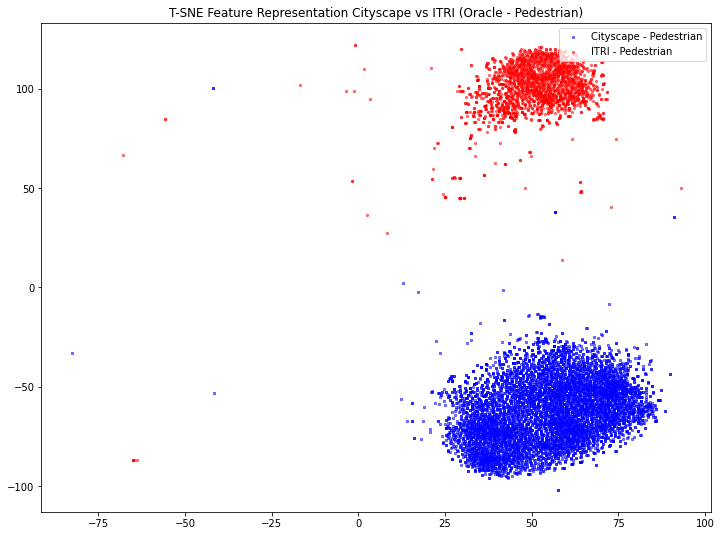

In [39]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_orac_city_features_tsne_class1 = x_orac_city_features_tsne[y_orac_city_labels==1]
x_orac_itri_features_tsne_class1 = x_orac_itri_features_tsne[y_orac_itri_labels==1]

ax1.scatter(x_orac_city_features_tsne_class1[:,0],
            x_orac_city_features_tsne_class1[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Pedestrian')

ax1.scatter(x_orac_itri_features_tsne_class1[:,0],
            x_orac_itri_features_tsne_class1[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Pedestrian')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Oracle - Pedestrian)')
plt.savefig('extracted_features/tsne/tsne_oracle_class1.png', bbox_inches='tight')
plt.show()

## Class 2 / Rider

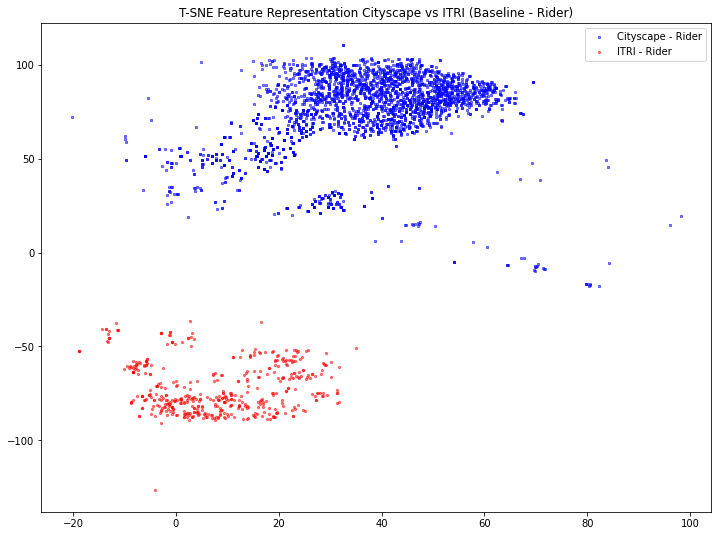

In [40]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_base_city_features_tsne_class2 = x_base_city_features_tsne[y_base_city_labels==2]
x_base_itri_features_tsne_class2 = x_base_itri_features_tsne[y_base_itri_labels==2]

ax1.scatter(x_base_city_features_tsne_class2[:,0],
            x_base_city_features_tsne_class2[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Rider')

ax1.scatter(x_base_itri_features_tsne_class2[:,0],
            x_base_itri_features_tsne_class2[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Rider')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline - Rider)')
plt.savefig('extracted_features/tsne/tsne_base_class2.png', bbox_inches='tight')
plt.show()

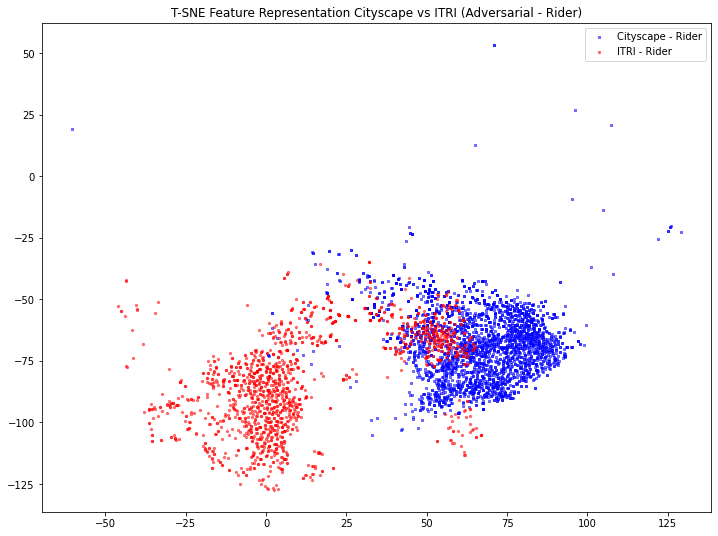

In [41]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_adv_city_features_tsne_class2 = x_adv_city_features_tsne[y_adv_city_labels==2]
x_adv_itri_features_tsne_class2 = x_adv_itri_features_tsne[y_adv_itri_labels==2]

ax1.scatter(x_adv_city_features_tsne_class2[:,0],
            x_adv_city_features_tsne_class2[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Rider')

ax1.scatter(x_adv_itri_features_tsne_class2[:,0],
            x_adv_itri_features_tsne_class2[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Rider')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial - Rider)')
plt.savefig('extracted_features/tsne/tsne_adv_class2.png', bbox_inches='tight')
plt.show()

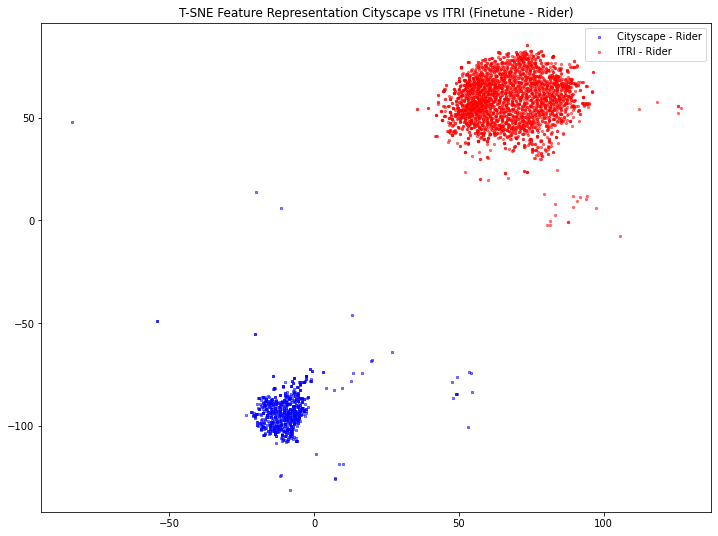

In [42]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_fine_city_features_tsne_class2 = x_fine_city_features_tsne[y_fine_city_labels==2]
x_fine_itri_features_tsne_class2 = x_fine_itri_features_tsne[y_fine_itri_labels==2]

ax1.scatter(x_fine_city_features_tsne_class2[:,0],
            x_fine_city_features_tsne_class2[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Rider')

ax1.scatter(x_fine_itri_features_tsne_class2[:,0],
            x_fine_itri_features_tsne_class2[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Rider')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Finetune - Rider)')
plt.savefig('extracted_features/tsne/tsne_fine_class2.png', bbox_inches='tight')
plt.show()

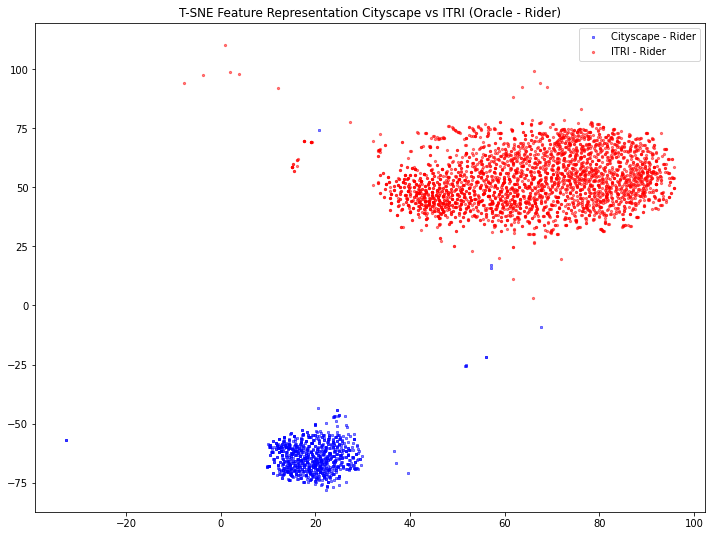

In [43]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_orac_city_features_tsne_class2 = x_orac_city_features_tsne[y_orac_city_labels==2]
x_orac_itri_features_tsne_class2 = x_orac_itri_features_tsne[y_orac_itri_labels==2]

ax1.scatter(x_orac_city_features_tsne_class2[:,0],
            x_orac_city_features_tsne_class2[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Rider')

ax1.scatter(x_orac_itri_features_tsne_class2[:,0],
            x_orac_itri_features_tsne_class2[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Rider')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Oracle - Rider)')
plt.savefig('extracted_features/tsne/tsne_oracle_class2.png', bbox_inches='tight')
plt.show()

## Class 3 / Two-Wheels

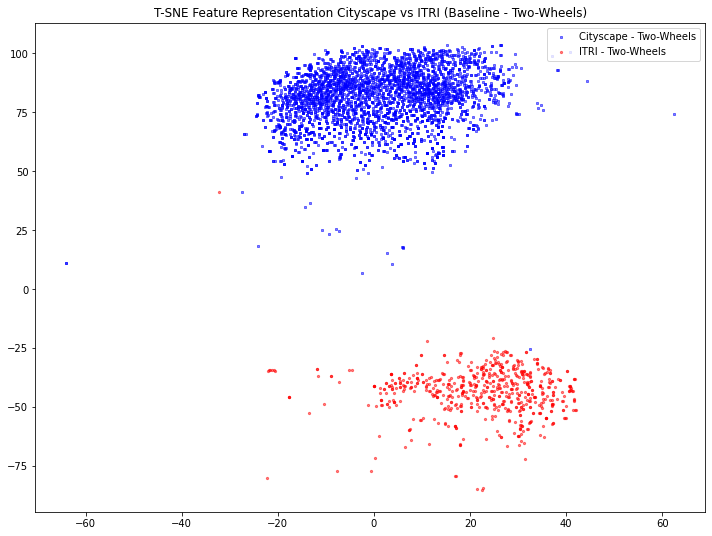

In [44]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_base_city_features_tsne_class3 = x_base_city_features_tsne[y_base_city_labels==3]
x_base_itri_features_tsne_class3 = x_base_itri_features_tsne[y_base_itri_labels==3]

ax1.scatter(x_base_city_features_tsne_class3[:,0],
            x_base_city_features_tsne_class3[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Two-Wheels')

ax1.scatter(x_base_itri_features_tsne_class3[:,0],
            x_base_itri_features_tsne_class3[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Two-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline - Two-Wheels)')
plt.savefig('extracted_features/tsne/tsne_base_class3.png', bbox_inches='tight')
plt.show()

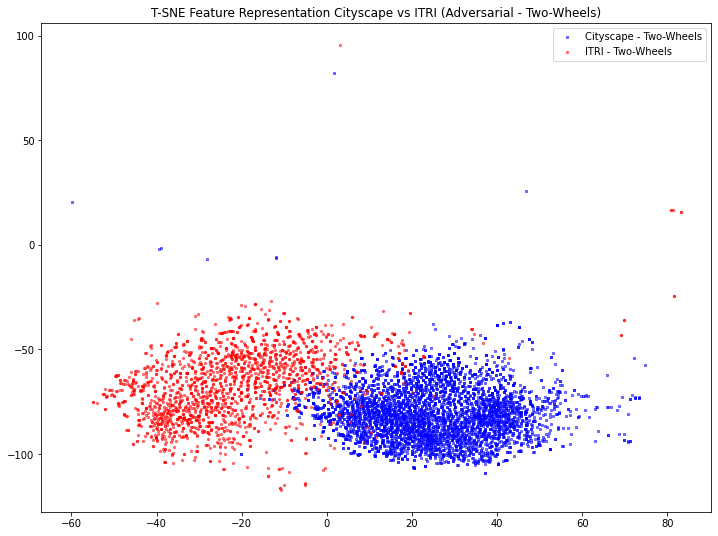

In [45]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_adv_city_features_tsne_class3 = x_adv_city_features_tsne[y_adv_city_labels==3]
x_adv_itri_features_tsne_class3 = x_adv_itri_features_tsne[y_adv_itri_labels==3]

ax1.scatter(x_adv_city_features_tsne_class3[:,0],
            x_adv_city_features_tsne_class3[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Two-Wheels')

ax1.scatter(x_adv_itri_features_tsne_class3[:,0],
            x_adv_itri_features_tsne_class3[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Two-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial - Two-Wheels)')
plt.savefig('extracted_features/tsne/tsne_adv_class3.png', bbox_inches='tight')
plt.show()

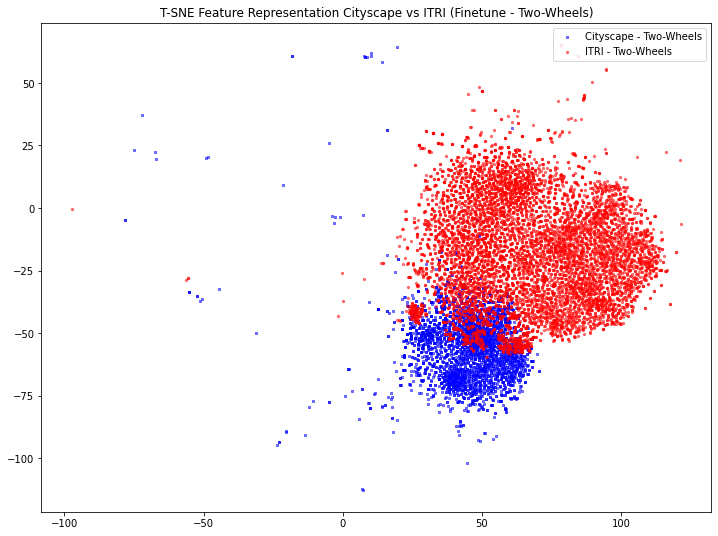

In [46]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_fine_city_features_tsne_class3 = x_fine_city_features_tsne[y_fine_city_labels==3]
x_fine_itri_features_tsne_class3 = x_fine_itri_features_tsne[y_fine_itri_labels==3]

ax1.scatter(x_fine_city_features_tsne_class3[:,0],
            x_fine_city_features_tsne_class3[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Two-Wheels')

ax1.scatter(x_fine_itri_features_tsne_class3[:,0],
            x_fine_itri_features_tsne_class3[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Two-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Finetune - Two-Wheels)')
plt.savefig('extracted_features/tsne/tsne_fine_class3.png', bbox_inches='tight')
plt.show()

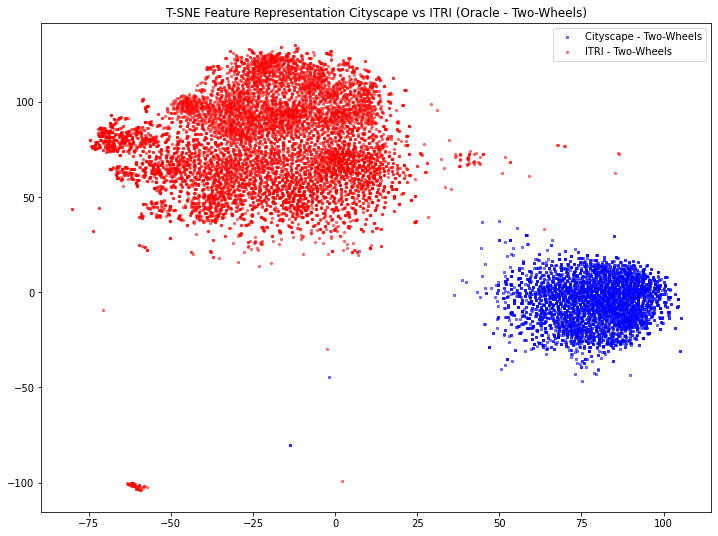

In [47]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_orac_city_features_tsne_class3 = x_orac_city_features_tsne[y_orac_city_labels==3]
x_orac_itri_features_tsne_class3 = x_orac_itri_features_tsne[y_orac_itri_labels==3]

ax1.scatter(x_orac_city_features_tsne_class3[:,0],
            x_orac_city_features_tsne_class3[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Two-Wheels')

ax1.scatter(x_orac_itri_features_tsne_class3[:,0],
            x_orac_itri_features_tsne_class3[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Two-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Oracle - Two-Wheels)')
plt.savefig('extracted_features/tsne/tsne_oracle_class3.png', bbox_inches='tight')
plt.show()

## Class 4 / Four-Wheels

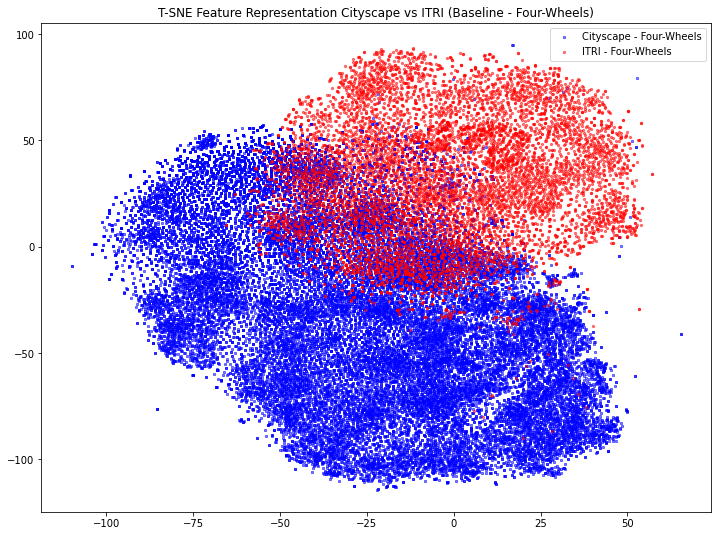

In [48]:
# Plot the Baseline Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_base_city_features_tsne_class4 = x_base_city_features_tsne[y_base_city_labels==4]
x_base_itri_features_tsne_class4 = x_base_itri_features_tsne[y_base_itri_labels==4]

ax1.scatter(x_base_city_features_tsne_class4[:,0],
            x_base_city_features_tsne_class4[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Four-Wheels')

ax1.scatter(x_base_itri_features_tsne_class4[:,0],
            x_base_itri_features_tsne_class4[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Four-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline - Four-Wheels)')
plt.savefig('extracted_features/tsne/tsne_base_class4.png', bbox_inches='tight')
plt.show()

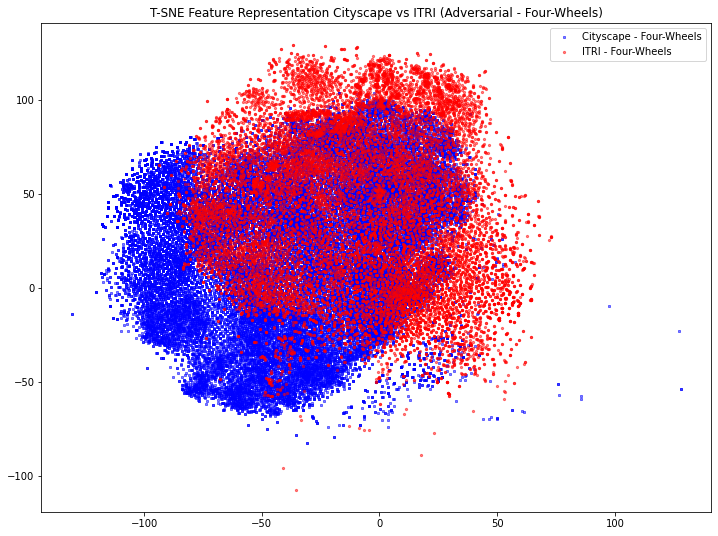

In [49]:
# Plot the Adversarial Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_adv_city_features_tsne_class4 = x_adv_city_features_tsne[y_adv_city_labels==4]
x_adv_itri_features_tsne_class4 = x_adv_itri_features_tsne[y_adv_itri_labels==4]

ax1.scatter(x_adv_city_features_tsne_class4[:,0],
            x_adv_city_features_tsne_class4[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Four-Wheels')

ax1.scatter(x_adv_itri_features_tsne_class4[:,0],
            x_adv_itri_features_tsne_class4[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Four-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial - Four-Wheels)')
plt.savefig('extracted_features/tsne/tsne_adv_class4.png', bbox_inches='tight')
plt.show()

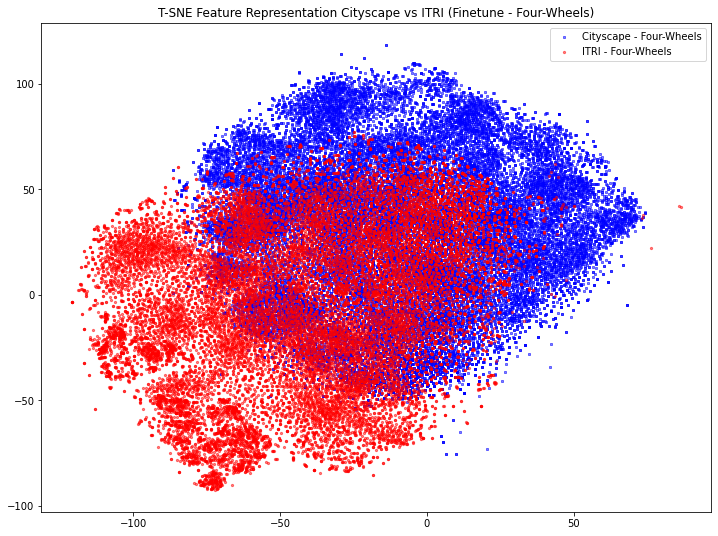

In [50]:
# Plot the Finetune Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_fine_city_features_tsne_class4 = x_fine_city_features_tsne[y_fine_city_labels==4]
x_fine_itri_features_tsne_class4 = x_fine_itri_features_tsne[y_fine_itri_labels==4]

ax1.scatter(x_fine_city_features_tsne_class4[:,0],
            x_fine_city_features_tsne_class4[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Four-Wheels')

ax1.scatter(x_fine_itri_features_tsne_class4[:,0],
            x_fine_itri_features_tsne_class4[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Four-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Finetune - Four-Wheels)')
plt.savefig('extracted_features/tsne/tsne_fine_class4.png', bbox_inches='tight')
plt.show()

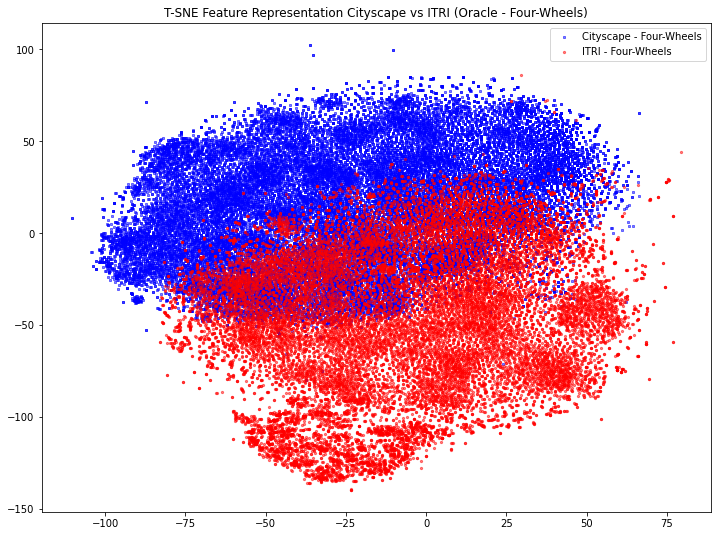

In [51]:
# Plot the Oracle Domain Gap
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

x_orac_city_features_tsne_class4 = x_orac_city_features_tsne[y_orac_city_labels==4]
x_orac_itri_features_tsne_class4 = x_orac_itri_features_tsne[y_orac_itri_labels==4]

ax1.scatter(x_orac_city_features_tsne_class4[:,0],
            x_orac_city_features_tsne_class4[:,1],
            s=5,
            c='b',
            alpha=.5,
            marker="s",
            label='Cityscape - Four-Wheels')

ax1.scatter(x_orac_itri_features_tsne_class4[:,0],
            x_orac_itri_features_tsne_class4[:,1],
            s=5,
            c='r',
            alpha=.5,
            marker="o",
            label='ITRI - Four-Wheels')

plt.legend(loc='upper right')
plt.title('T-SNE Feature Representation Cityscape vs ITRI (Oracle - Four-Wheels)')
plt.savefig('extracted_features/tsne/tsne_oracle_class4.png', bbox_inches='tight')
plt.show()

# All Class

In [52]:
# # Plot the Baseline Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_base_city_features_tsne_class1[:,0],
#             x_base_city_features_tsne_class1[:,1],
#             s=1,
#             c='blue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Pedestrian')

# ax1.scatter(x_base_city_features_tsne_class2[:,0],
#             x_base_city_features_tsne_class2[:,1],
#             s=1,
#             c='mediumblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Rider')

# ax1.scatter(x_base_city_features_tsne_class3[:,0],
#             x_base_city_features_tsne_class3[:,1],
#             s=1,
#             c='darkblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Two-Wheels')

# ax1.scatter(x_base_city_features_tsne_class4[:,0],
#             x_base_city_features_tsne_class4[:,1],
#             s=1,
#             c='midnightblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Four-Wheels')

# ax1.scatter(x_base_itri_features_tsne_class1[:,0],
#             x_base_itri_features_tsne_class1[:,1],
#             s=1,
#             c='red',
#             alpha=1,
#             marker="o",
#             label='ITRI - Pedestrian')

# ax1.scatter(x_base_itri_features_tsne_class2[:,0],
#             x_base_itri_features_tsne_class2[:,1],
#             s=1,
#             c='indianred',
#             alpha=1,
#             marker="o",
#             label='ITRI - Rider')

# ax1.scatter(x_base_itri_features_tsne_class3[:,0],
#             x_base_itri_features_tsne_class3[:,1],
#             s=1,
#             c='firebrick',
#             alpha=1,
#             marker="o",
#             label='ITRI - Two-Wheels')

# ax1.scatter(x_base_itri_features_tsne_class4[:,0],
#             x_base_itri_features_tsne_class4[:,1],
#             s=1,
#             c='darkred',
#             alpha=1,
#             marker="o",
#             label='ITRI - Four-Wheels')

# plt.legend(loc='lower right')
# plt.title('T-SNE Feature Representation Cityscape vs ITRI (Baseline)')
# plt.show()

In [53]:
# # Plot the Adversarial Domain Gap
# fig = plt.figure(figsize=(12, 9))
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_adv_city_features_tsne_class1[:,0],
#             x_adv_city_features_tsne_class1[:,1],
#             s=1,
#             c='blue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Pedestrian')

# ax1.scatter(x_adv_city_features_tsne_class2[:,0],
#             x_adv_city_features_tsne_class2[:,1],
#             s=1,
#             c='mediumblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Rider')

# ax1.scatter(x_adv_city_features_tsne_class3[:,0],
#             x_adv_city_features_tsne_class3[:,1],
#             s=1,
#             c='darkblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Two-Wheels')

# ax1.scatter(x_adv_city_features_tsne_class4[:,0],
#             x_adv_city_features_tsne_class4[:,1],
#             s=1,
#             c='midnightblue',
#             alpha=1,
#             marker="s",
#             label='Cityscape - Four-Wheels')

# ax1.scatter(x_adv_itri_features_tsne_class1[:,0],
#             x_adv_itri_features_tsne_class1[:,1],
#             s=1,
#             c='red',
#             alpha=1,
#             marker="o",
#             label='ITRI - Pedestrian')

# ax1.scatter(x_adv_itri_features_tsne_class2[:,0],
#             x_adv_itri_features_tsne_class2[:,1],
#             s=1,
#             c='indianred',
#             alpha=1,
#             marker="o",
#             label='ITRI - Rider')

# ax1.scatter(x_adv_itri_features_tsne_class3[:,0],
#             x_adv_itri_features_tsne_class3[:,1],
#             s=1,
#             c='firebrick',
#             alpha=1,
#             marker="o",
#             label='ITRI - Two-Wheels')

# ax1.scatter(x_adv_itri_features_tsne_class4[:,0],
#             x_adv_itri_features_tsne_class4[:,1],
#             s=1,
#             c='darkred',
#             alpha=1,
#             marker="o",
#             label='ITRI - Four-Wheels')

# plt.legend(loc='lower left')
# plt.title('T-SNE Feature Representation Cityscape vs ITRI (Adversarial)')
# plt.show()